In [ ]:
pip install textblob 

In [ ]:
pip install tweepy

In [ ]:
pip install fake_useragent

In [ ]:
import codecs
import requests
import tweepy
from textblob import TextBlob
import sys
import csv

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re
import networkx
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
#sns.set(font_scale=1.5)
#sns.set_style("whitegrid")

In [ ]:
# Inserting API keys
consumer_key= '' #insert personal keys here
consumer_secret= ''
access_token=''
access_token_secret=''
# Authentication 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [21]:
# Function to remove URLs from tweets
def urlRemove(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [44]:
# Set custom search 
search = "#biden+harris+administration -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search,
                   lang="en",
                   since='2021-08-20').items(1000) # change this date furhter back or more recent based on time interval of interest

# Remove URLs
tweets_cleaned = [urlRemove(tweet.text) for tweet in tweets]

In [45]:
# TextBlob object of pulled tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0, TextBlob("MEET THE DEMOCRATS Harris Biden Administration via YouTube"))

In [46]:
# Get polarity values of tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0, 'MEET THE DEMOCRATS Harris Biden Administration via YouTube']

In [48]:
# Put tweets and polarity in dataframe
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

sentiment_df.head()

,polarity,tweet
1,-0.155556,no No NO Remenber The BidenHarris administrati...
5,-0.200000,Kabul ExPence Advisor Warned Trump Was Setting...
8,0.008333,12 US military personnel killed in bomb attack...
9,0.500000,If there is a hostage situation in Afghanistan...
11,-0.200000,Disgraceful Biden this is on you and your admi...


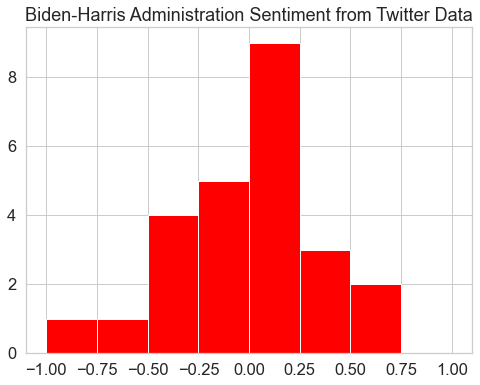

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="red")

plt.title("Biden-Harris Administration Sentiment from Twitter Data")
plt.show()